# Opis wkładu
Każda z nas samodzielnie napisała rozwiązania do zadań projektu. Następnie wymieniłyśmy się kodami i je sprawdziłyśmy.</br>
Katarzyna zidentyfikowała źródło niezgodności rozwiązań, dopracowała ostateczne opisy i interpretacje wyników.</br>
Anastazja poprawiła błąd na podstawie rozwiązania Katarzyny i dopracowała ostateczny kod z rozwiązaniami zadań projektu.

# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



## 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

In [1]:
# Imports
import pandas as pd
import requests
import zipfile
import io, os
import re
import load_data
import calculations
import visualizations

In [2]:
# Pobieranie danych dla podanych lat
from load_data import load_pm25_data
# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2015: '236', 2018: '603', 2021: '486', 2024: '582'}
gios_pm25_file = {2015: '2015_PM25_1g.xlsx', 2018: '2018_PM25_1g.xlsx', 2021: '2021_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

years = [2015, 2018, 2021, 2024]
dfs = load_pm25_data(years, gios_archive_url, gios_url_ids, gios_pm25_file)

In [3]:
# Wczytanie metadanych stacji
metadata_df = load_data.load_metadata()
print(f'Kolumny w metadanych:\n {metadata_df.columns.tolist()}\n')

Kolumny w metadanych:
 ['Nr', 'Kod stacji', 'Kod międzynarodowy', 'Nazwa stacji', 'Stary Kod stacji', 'Data uruchomienia', 'Data zamknięcia', 'Typ stacji', 'Typ obszaru', 'Rodzaj stacji', 'Województwo', 'Miejscowość', 'Adres', 'WGS84 φ N', 'WGS84 λ E']



In [4]:
# Wyciąganie starych kodów i miejscowości (tworzenie słowników)
old_codes, cities = load_data.get_old_station_codes(metadata_df)
            
print(f"Słownik stare kody i nowe kody stacji:\nLiczba pozycji: {len(old_codes)}")
print(f"Przykładowe wpisy: {list(old_codes.items())[:5]}")

print(f"\nSłownik kodów stacji i miejscowości:\nLiczba pozycji: {len(cities)}")
print(f"Przykładowe wpisy: {list(cities.items())[:5]}")

Słownik stare kody i nowe kody stacji:
Liczba pozycji: 303
Przykładowe wpisy: [('DsBogatMob', 'DsBogatFrancMOB'), ('DsCzer02', 'DsCzerStraza'), ('DsDzia01', 'DsDzialoszyn'), ('DsDzierPilsA', 'DsDziePilsud'), ('DsGlogWita', 'DsGlogWiStwo')]

Słownik kodów stacji i miejscowości:
Liczba pozycji: 1133
Przykładowe wpisy: [('DsBialka', 'Białka'), ('DsBielGrot', 'Bielawa'), ('DsBogatFrancMOB', 'Bogatynia'), ('DsBogChop', 'Bogatynia'), ('DsBogZatonieMob', 'Bogatynia')]


In [5]:
# Czyszczenie danych PM2.5
dfs_cleaned = load_data.clean_pm25_data(dfs)

C:\Users\gozma\jupyter\load_data.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df = cleaned_df.replace(',', '.', regex=True)
C:\Users\gozma\jupyter\load_data.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df = cleaned_df.replace(',', '.', regex=True)
C:\Users\gozma\jupyter\load_data.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

In [6]:
# Zamiana starych kodów na nowe
dfs_new_codes = load_data.replace_old_codes(dfs_cleaned, old_codes)


Rok 2015 → liczba mapowań: 5

Przykładowe mapowania:
    PdBialWaszyn → PdBialUpalna
    PmGdaLeczk08 → PmGdaLeczkow
    PmKosTargo12 → PmKosTargowa
    ZpSzczAndr01 → ZpSzczAndrze
    ZpSzczPils02 → ZpSzczPilsud

Rok 2018 → liczba mapowań: 7

Przykładowe mapowania:
    MzKonJezMos → MzKonJezWieMOB
    PdBialWaszyn → PdBialUpalna
    PdSuwPulaskp → PdSuwPulask2
    PmGdaLeczk08 → PmGdaLeczkow
    PmKosTargo12 → PmKosTargowa

Rok 2021 → liczba mapowań: 1

Przykładowe mapowania:
    PdBialWaszyn → PdBialUpalna

Rok 2024 → liczba mapowań: 0


In [7]:
# Poprawianie dat
dfs_corrected_dates = load_data.correct_dates(dfs_new_codes)

Przykład zmiany daty w 2015: 2015-01-02 00:00:00.110000 → 2015-01-01 23:59:59
Przykład zmiany daty w 2018: 2018-01-02 00:00:00 → 2018-01-01 23:59:59
Przykład zmiany daty w 2021: 2021-01-02 00:00:00 → 2021-01-01 23:59:59
Przykład zmiany daty w 2024: 2024-01-02 00:00:00 → 2024-01-01 23:59:59


In [8]:
# Sprawdzenie liczby dni w każdym df po korekcie
for year, df in dfs_corrected_dates.items():
    dni = pd.to_datetime(df['Data']).dt.date.nunique()
    print(f"{year} → {dni} dni")

2015 → 365 dni
2018 → 365 dni
2021 → 365 dni
2024 → 366 dni


In [9]:
# Sprawdzenie liczby stacji w każdym df
for year in years:
    df = dfs_corrected_dates[year]
    liczba_stacji = df.shape[1] - 1
    print(f"{year} → {liczba_stacji} stacji")

2015 → 42 stacji
2018 → 51 stacji
2021 → 88 stacji
2024 → 96 stacji


In [10]:
# Sanity check wspólnych stacji
years = list(dfs_corrected_dates.keys())
dfs_list = [dfs_corrected_dates[year] for year in years]

common_stations = set(dfs_list[0].columns[1:])

for df in dfs_list[1:]:
    common_stations &= set(df.columns[1:])

print(f"Wspólne stacje we wszystkich latach: {len(common_stations)}")

Wspólne stacje we wszystkich latach: 30


In [11]:
# Sprawdzenie liczby dni w każdym roku po złączeniu
for rok, df in dfs_corrected_dates.items():
    dni = pd.to_datetime(df['Data']).dt.date.nunique()
    print(f"{rok} → {dni} dni")

2015 → 365 dni
2018 → 365 dni
2021 → 365 dni
2024 → 366 dni


In [12]:
# Łączenie danych w jeden DataFrame
combined_df = load_data.merge_dataframes(dfs_corrected_dates, cities)

In [13]:
# Zapisywanie do pliku Excel
final_file_path = 'combined_pm25_data.xlsx'
load_data.save_to_excel(combined_df, final_file_path)

## 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2015 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [14]:
# Obliczanie średnich miesięcznych stężeń na stacje
month_means_df = calculations.calculate_station_monthly_averages(combined_df)
month_means_df.head()

Jelenia Góra      Wrocław                 Bydgoszcz               \
             DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna KpBydWarszaw   
Rok  Miesiąc                                                                    
2015 1          24.504821    32.921321    27.863459    21.016268    25.890511   
     2          41.859821    45.884722    42.238897    45.497710    49.939606   
     3          28.603600    35.995391    32.581978    33.105139    24.413016   
     4          12.323373    19.873433    15.131175    16.357370          NaN   
     5           8.716385    18.487889    13.339719    12.793215    12.668022   

                   Lublin         Łódź       Zgierz Zielona Góra       Kraków  \
             LbLubObywate LdLodzCzerni LdZgieMielcz LuZielKrotka MpKrakAlKras   
Rok  Miesiąc                                                                    
2015 1          26.493200    27.279348    26.402375    25.087498    46.291156   
     2          55.702503    41.245764    44.475336    36.030131    74.529224   
     3          43.421745    30.667972    35.808276    30.291795    57.085309   
     4          20.120187    15.336890    16.491453    15.575828    34.743410   
     5          15.940160    12.292181    10.081744    13.638301    26.696521   

              ...    Białystok     Przemyśl       Gdańsk  Kościerzyna  \
              ... PdBialUpalna PkPrzemGrunw PmGdaLeczkow PmKosTargowa   
Rok  Miesiąc  ...                                                       
2015 1        ...    22.464238    26.429636    15.251184    36.803262   
     2        ...    41.037325    41.343068    21.435362    51.354948   
     3        ...    30.945504    41.525408    17.027339    33.843097   
     4        ...    13.426136    15.119868    10.397704    22.013987   
     5        ...    10.741935    14.765689     8.397277    13.261692   

                 Katowice  Złoty Potok      Olsztyn       Kalisz     Szczecin  \
             SlKatoKossut SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze   
Rok  Miesiąc                                                                    
2015 1          31.247839    20.490547    24.267375    32.039886    15.459798   
     2          56.355432    36.671320    39.770500    48.900846    27.669420   
     3          39.389542    24.287572    29.642556    41.674071    23.534377   
     4          23.598871    13.962515    13.321504    24.054884    11.757418   
     5          18.055464    11.586400    11.356201    19.572950     8.544743   

                           
             ZpSzczPilsud  
Rok  Miesiąc               
2015 1          21.217074  
     2          36.168946  
     3          27.924340  
     4          15.930986  
     5          11.215703  

[5 rows x 30 columns]

In [15]:
# Obliczanie średnich miesięcznych na miasto
city_month_means_df = calculations.calculate_city_monthly_averages(month_means_df)
city_month_means_df.head()

Białystok  Bydgoszcz     Gdańsk  Jelenia Góra     Kalisz  \
Rok  Miesiąc                                                             
2015 1        22.464238  23.453389  15.251184     24.504821  32.039886   
     2        41.037325  47.718658  21.435362     41.859821  48.900846   
     3        30.945504  28.759077  17.027339     28.603600  41.674071   
     4        13.426136  16.357370  10.397704     12.323373  24.054884   
     5        10.741935  12.730619   8.397277      8.716385  19.572950   

               Katowice  Kościerzyna     Kraków  Kędzierzyn-Koźle  Legionowo  \
Rok  Miesiąc                                                                   
2015 1        31.247839    36.803262  41.628128         31.394930  34.321645   
     2        56.355432    51.354948  66.885357         57.073201  62.339970   
     3        39.389542    33.843097  50.561973         38.120842  56.189266   
     4        23.598871    22.013987  28.481166         21.032000  23.671014   
     5        18.055464    13.261692  22.671500         15.679388  19.361711   

              ...      Radom    Siedlce   Szczecin   Warszawa    Wrocław  \
Rok  Miesiąc  ...                                                          
2015 1        ...  38.148750  23.891594  18.338436  24.949725  30.392390   
     2        ...  60.714142  44.468838  31.919183  44.535612  44.061810   
     3        ...  41.123270  36.035519  25.729359  34.083272  34.288685   
     4        ...  20.466768  14.500086  13.844202  17.091031  17.502304   
     5        ...  15.448248  14.827582   9.880223  16.160474  15.913804   

                 Zgierz  Zielona Góra  Złoty Potok       Łódź   Żyrardów  
Rok  Miesiąc                                                              
2015 1        26.402375     25.087498    20.490547  27.279348  40.944131  
     2        44.475336     36.030131    36.671320  41.245764  65.601905  
     3        35.808276     30.291795    24.287572  30.667972  51.063809  
     4        16.491453     15.575828    13.962515  15.336890  21.151231  
     5        10.081744     13.638301    11.586400  12.292181  18.697539  

[5 rows x 25 columns]

In [16]:
# Wyciąganie danych dla Warszawy i Katowic w latach 2015 i 2024
chosen_df = load_data.get_cities_years(city_month_means_df, ["Warszawa", "Katowice"], [2015, 2024])
chosen_df.head()

,Rok,Miesiąc,Warszawa,Katowice
0,2015,1,24.949725,31.247839
1,2015,2,44.535612,56.355432
2,2015,3,34.083272,39.389542
3,2015,4,17.091031,23.598871
4,2015,5,16.160474,18.055464


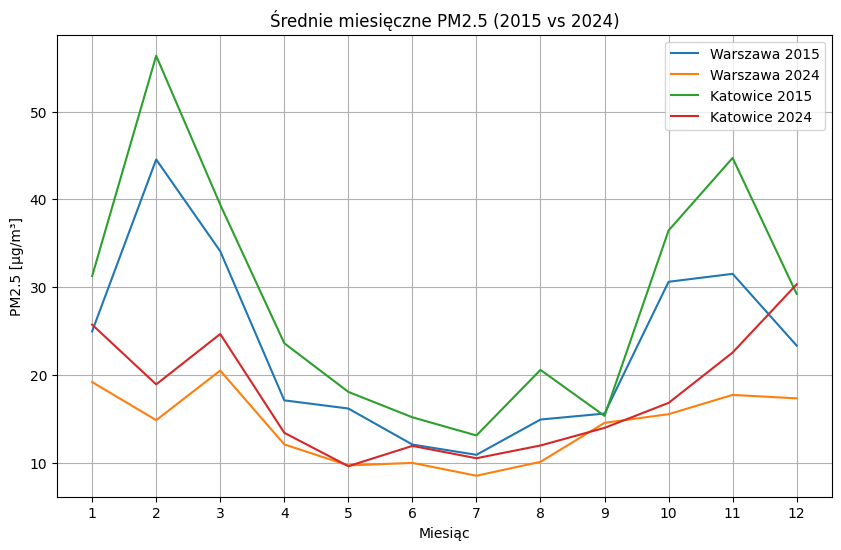

In [17]:
# Rysowanie wykresu porównawczego
visualizations.plot_monthly_averages(chosen_df, "Średnie miesięczne PM2.5 (2015 vs 2024)")

# Opis różnic i interpretacja wyników
Zarówno w Warszawie, jak i Katowicach widać wyraźny wzrost stężenia PM2.5 w zimowych miesiącach (styczeń–marzec i październik–grudzień). Najniższe stężenia występują latem (maj–sierpień), co wynika z sezonowego korzystania z ogrzewania.

Katowice w 2015 roku mają wyraźnie wyższe stężenia niż Warszawa (zielona linia powyżej niebieskiej), szczególnie zimą.
Natomiast w 2024 roku średnie dla Katowic i Warszawy są do siebie zbliżone, ale Katowice nadal mają lekko wyższe wartości zimą.
Ogólnie Katowice są bardziej zanieczyszczone PM2.5 niż Warszawa, ale różnica między poziomami zanieczyszczenia zmniejsza się. Przyczyny większego zanieczyszczenia powietrza w Katowicach można doszukiwać się m.in. w większym udziale przemysłu ciężkiego oraz lokalnych źródłach ogrzewania.

W 2024 roku średnie stężenia są znacznie niższe niż w 2015 dla obu miast.
Zmniejszenie stężenia PM2.5 w 2024 jest najbardziej widoczne w miesiącach zimowych (styczeń–marzec i październik-grudzień), co sugeruje poprawę jakości powietrza, prawdopodobnie dzięki efektywnym programom antysmogowym oraz wymianie nieefektywnych źródeł ogrzewania.
Ogólny trend jest pozytywny - średnie miesięczne wartości PM2.5 spadają w obu miastach w porównywanych latach.

## 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w wszystkich latach (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

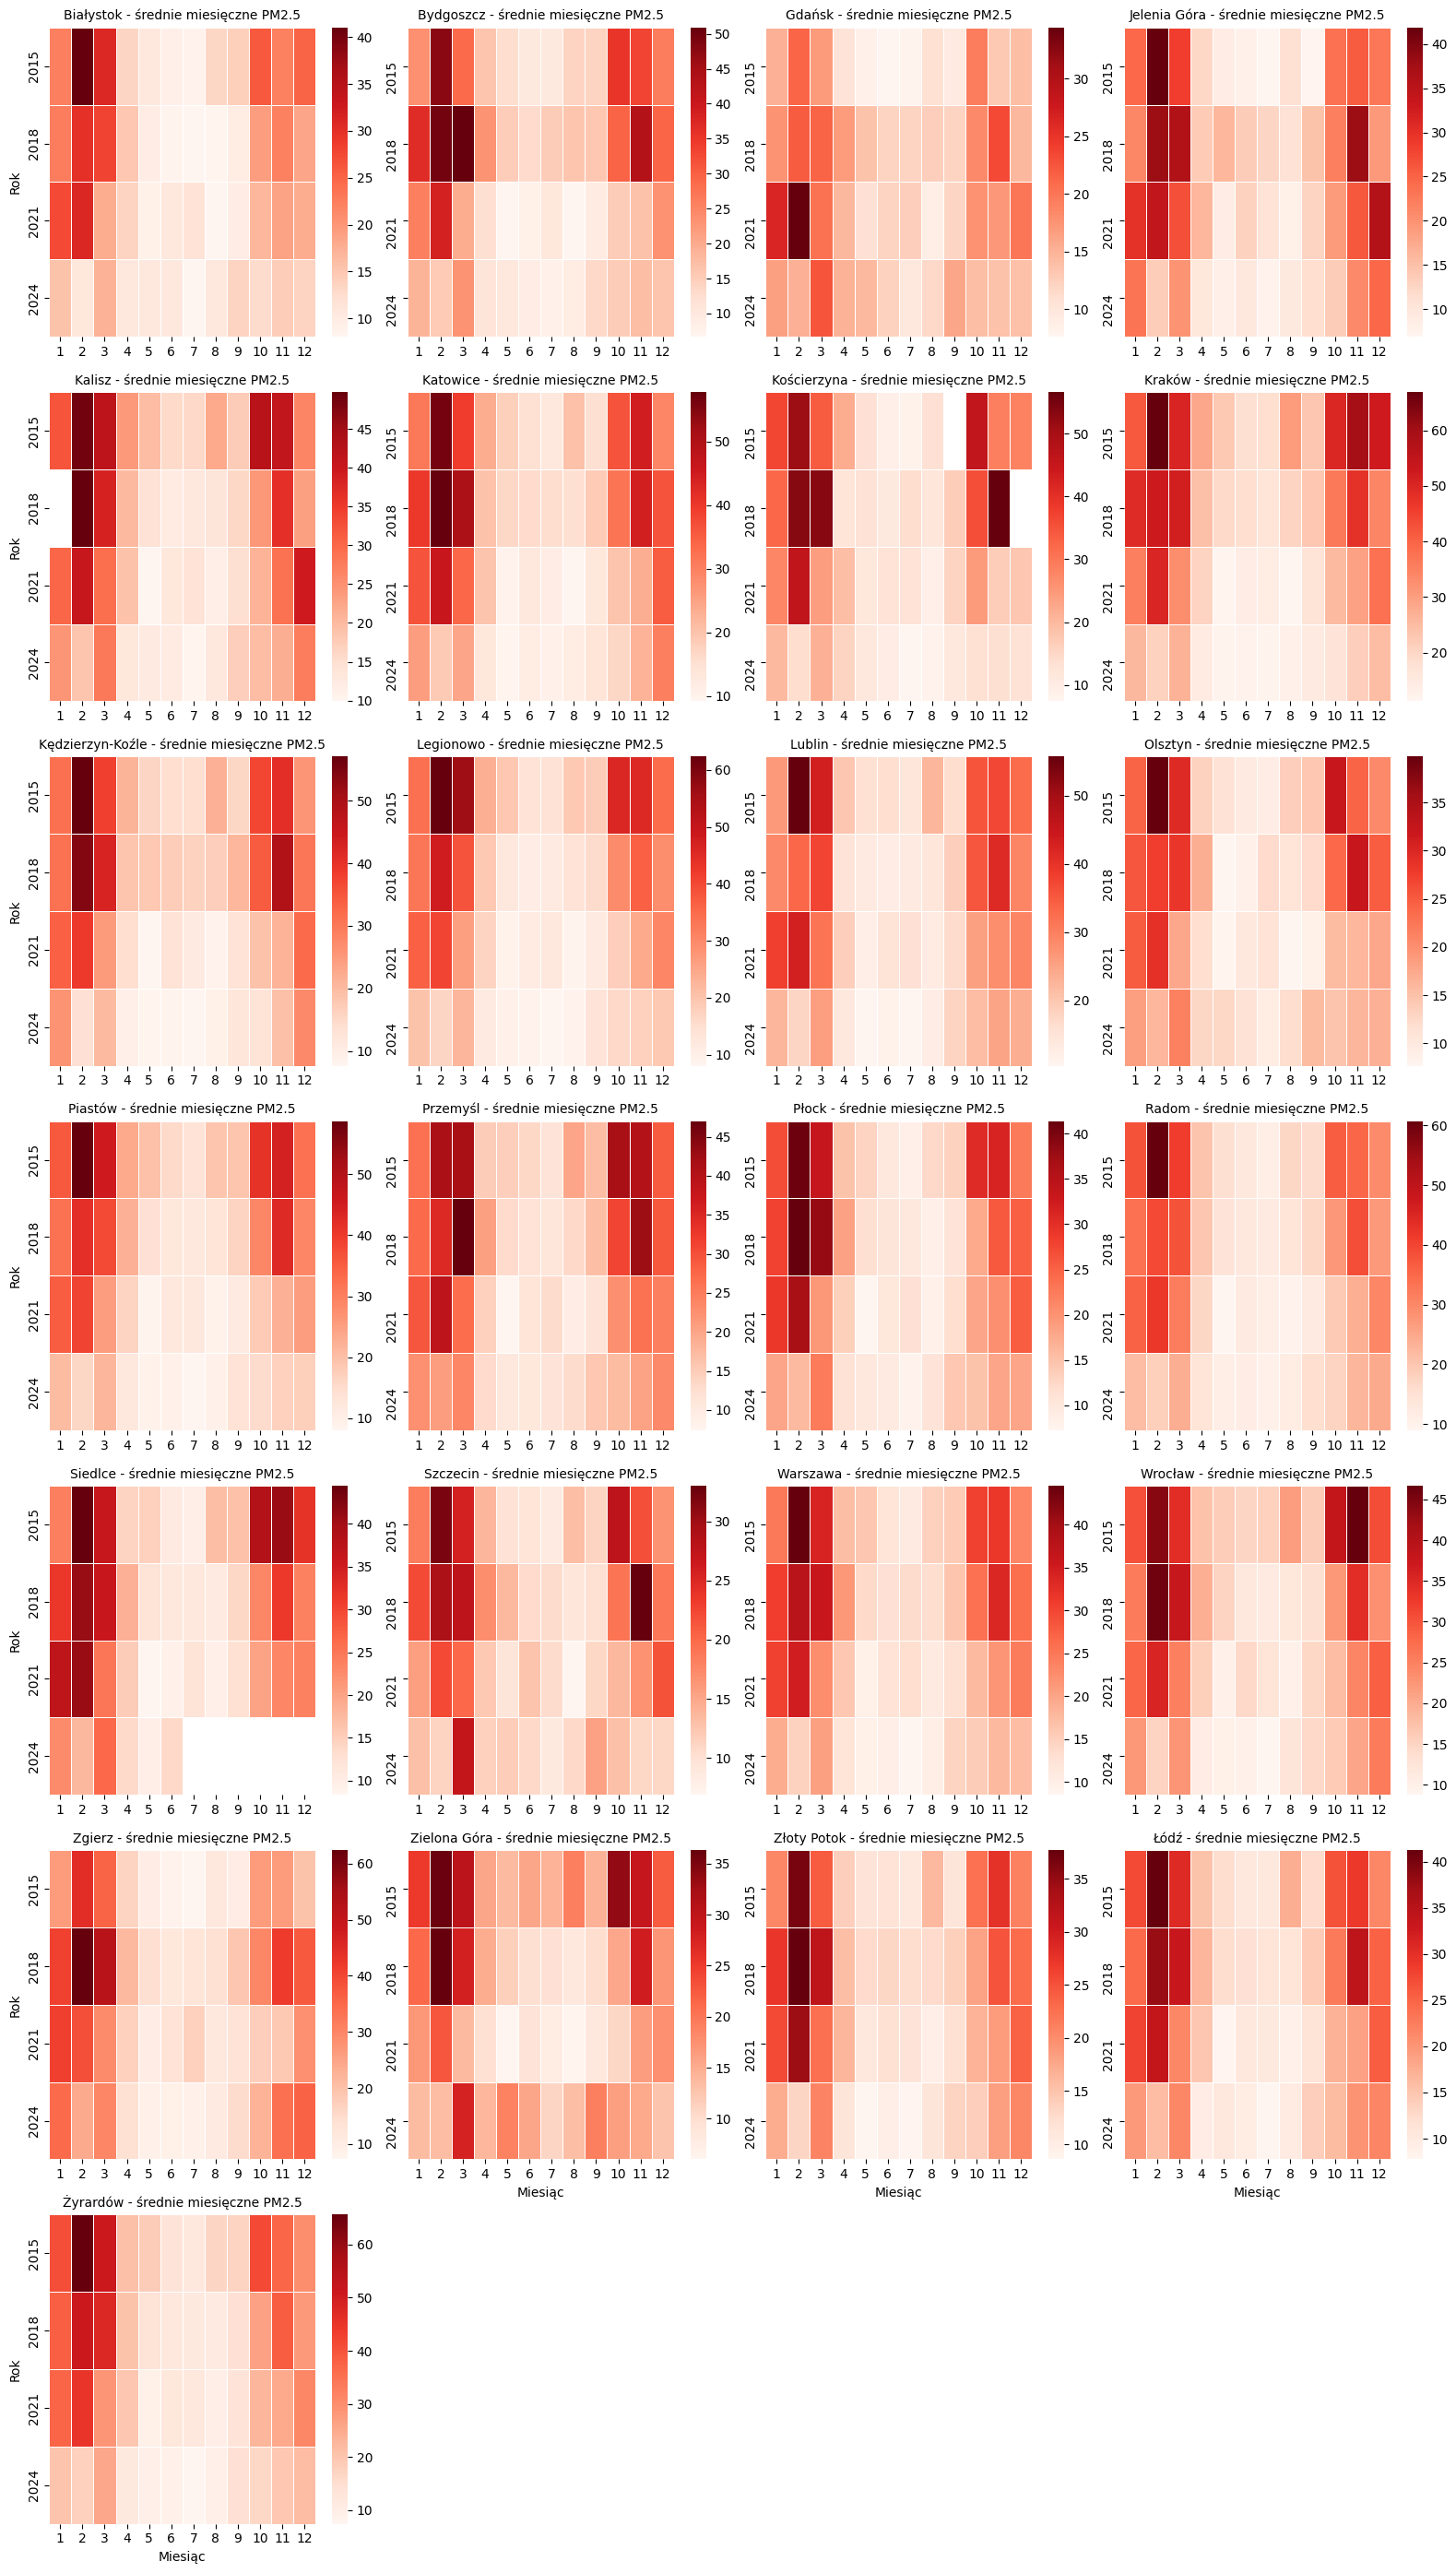

In [18]:
# Rysowanie heatmapy dla każdego miasta
city_month_means_df = city_month_means_df.reset_index()
visualizations.plot_heatmaps(city_month_means_df)

# Interpretacja wyników

Na heatmapach widoczna jest wyraźna sezonowość zmian zanieczyszczenia powietrza pyłem PM2.5. Każdego roku największe stężenie PM2.5 było obserwowane w okresie październik-marzec, czego przyczyny można doszukiwać się w okresie grzewczym. Z kolei w miesiącach letnich poziomy PM2.5 są znacznie niższe. 

W danych obserwuje się także tendencję spadkową w kolejnych latach, szczególnie w sezonie zimowym, co wskazuje na stopniową poprawę jakości powietrza. Letnie miesiące pozostają relatywnie czyste przez cały analizowany okres.

Podsumowując, wyniki pokazują stopniową poprawę jakości powietrza w okresie jesienno-zimowym, przy jednoczesnym utrzymaniu niskiego poziomu PM2.5 latem.
Dodatkowo na wykresach widoczne są miejscami braki danych pomiarowych, co objawia się pustymi polami na wybranych miesiącach, jednak nie zaburza to ogólnego obrazu sezonowości i poprawy jakości powietrza.

## 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok. Dołącz opis i interpretację obserwowanych różnic.

In [19]:
exceeded_results = calculations.calculate_days_exceeding_limit(combined_df)
exceeded_top_bottom_df = calculations.get_3_lowest_highest(exceeded_results, 2024)

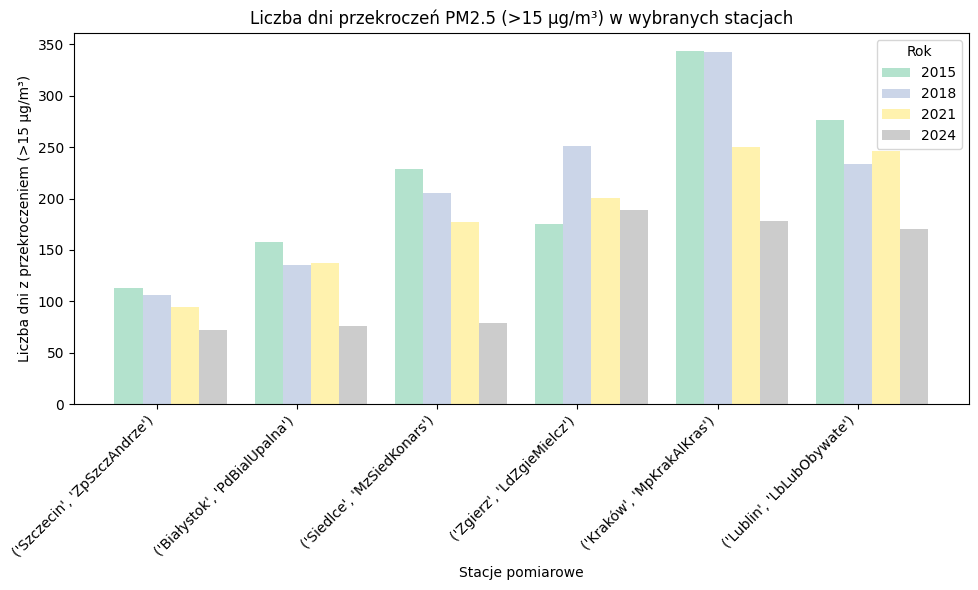

In [20]:
# Rysowanie wykresu słupkowego porównującego liczbę dni przekroczeń dla wybranych stacji w różnych latach
visualizations.plot_exceeding_days(exceeded_top_bottom_df, "Liczba dni przekroczeń PM2.5 (>15 µg/m³) w wybranych stacjach")

# Opis różnic
U większości stacji widać wyraźny spadek z roku na rok — wyjątkiem jest Zgierz, gdzie poprawy nie ma. Należy również zaznaczyć, że wyniki dla Siedlc z 2024 obejmują jednynie pierwszą połowę roku (dla drugiej brak pomiarów) dlatego nie odzwierciedlają w pełni rzeczywistej sytuacji. Kraków wyróżnia się szczególnie — odnotowywał wartości sięgające ok. 340 dni rocznie, ale jednocześnie wykazał największą poprawę na przestrzeni lat.
W 2024: stacje z najgorszymi rezultatami mają ok. 180–190 dni z przekroczeniem norm, a stacje z najlepszymi ok. 70-100 dni.</br> 
Poza stacją w Zgierzu widoczna jest wyraźna tendencja spadkowa z roku na rok.

# Interpretacja wyników
Poprawa powietrza widoczna jest na większości stacji. Największą poprawę odnotowała stacja w Krakowie, co wskazuje na skuteczność działań antysmogowych podejmowanych w mieście — mimo tego w 2024 roku pozostaje ona nadal w grupie najbardziej zanieczyszczonych lokalizacji.
Brak poprawy w Zgierzu może sugerować problemy z wdrażaniem lokalnych działań poprawiających jakość powietrza. Lublin również pozostaje w grupie stacji o wysokiej liczbie dni z przekroczeniami, jednak w jego przypadku tempo spadku jest umiarkowane.

Stacje charakteryzujące się najlepszymi wynikami w 2024 roku to te, które wykazały stabilny i wyraźny spadek liczby dni z przekroczeniami oraz miały niższy stan wyjściowy.